In [ ]:
import os
from tensorflow import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings('ignore')

In [11]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [12]:
dataset_path = '/content/drive/MyDrive/Remake' 
print(os.listdir(dataset_path))


['Bacterial', 'fungal', 'healthy', 'Shepherd_purse_weeds']


In [13]:

images = []
labels = []

for subfolder in os.listdir(dataset_path):

    subfolder_path = os.path.join(dataset_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue

    for image_filename in os.listdir(subfolder_path):
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)

        labels.append(subfolder)

df = pd.DataFrame({'image': images, 'label': labels})
df.head()

,image,label
0,/content/drive/MyDrive/Remake/Bacterial/ba34_3...,Bacterial
1,/content/drive/MyDrive/Remake/Bacterial/ba34_2...,Bacterial
2,/content/drive/MyDrive/Remake/Bacterial/ba34_0...,Bacterial
3,/content/drive/MyDrive/Remake/Bacterial/ba34_4...,Bacterial
4,/content/drive/MyDrive/Remake/Bacterial/augmen...,Bacterial


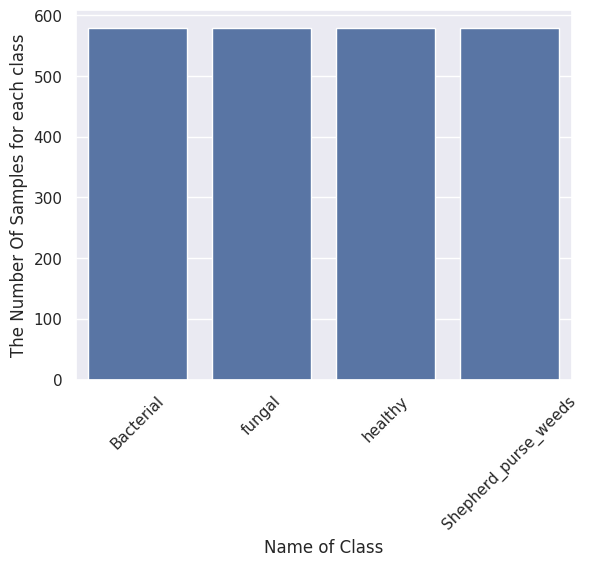

In [14]:
ax = sns.countplot(x=df.label)

ax.set_xlabel("Name of Class")
ax.set_ylabel("The Number Of Samples for each class")

plt.xticks(rotation=45)

plt.show()

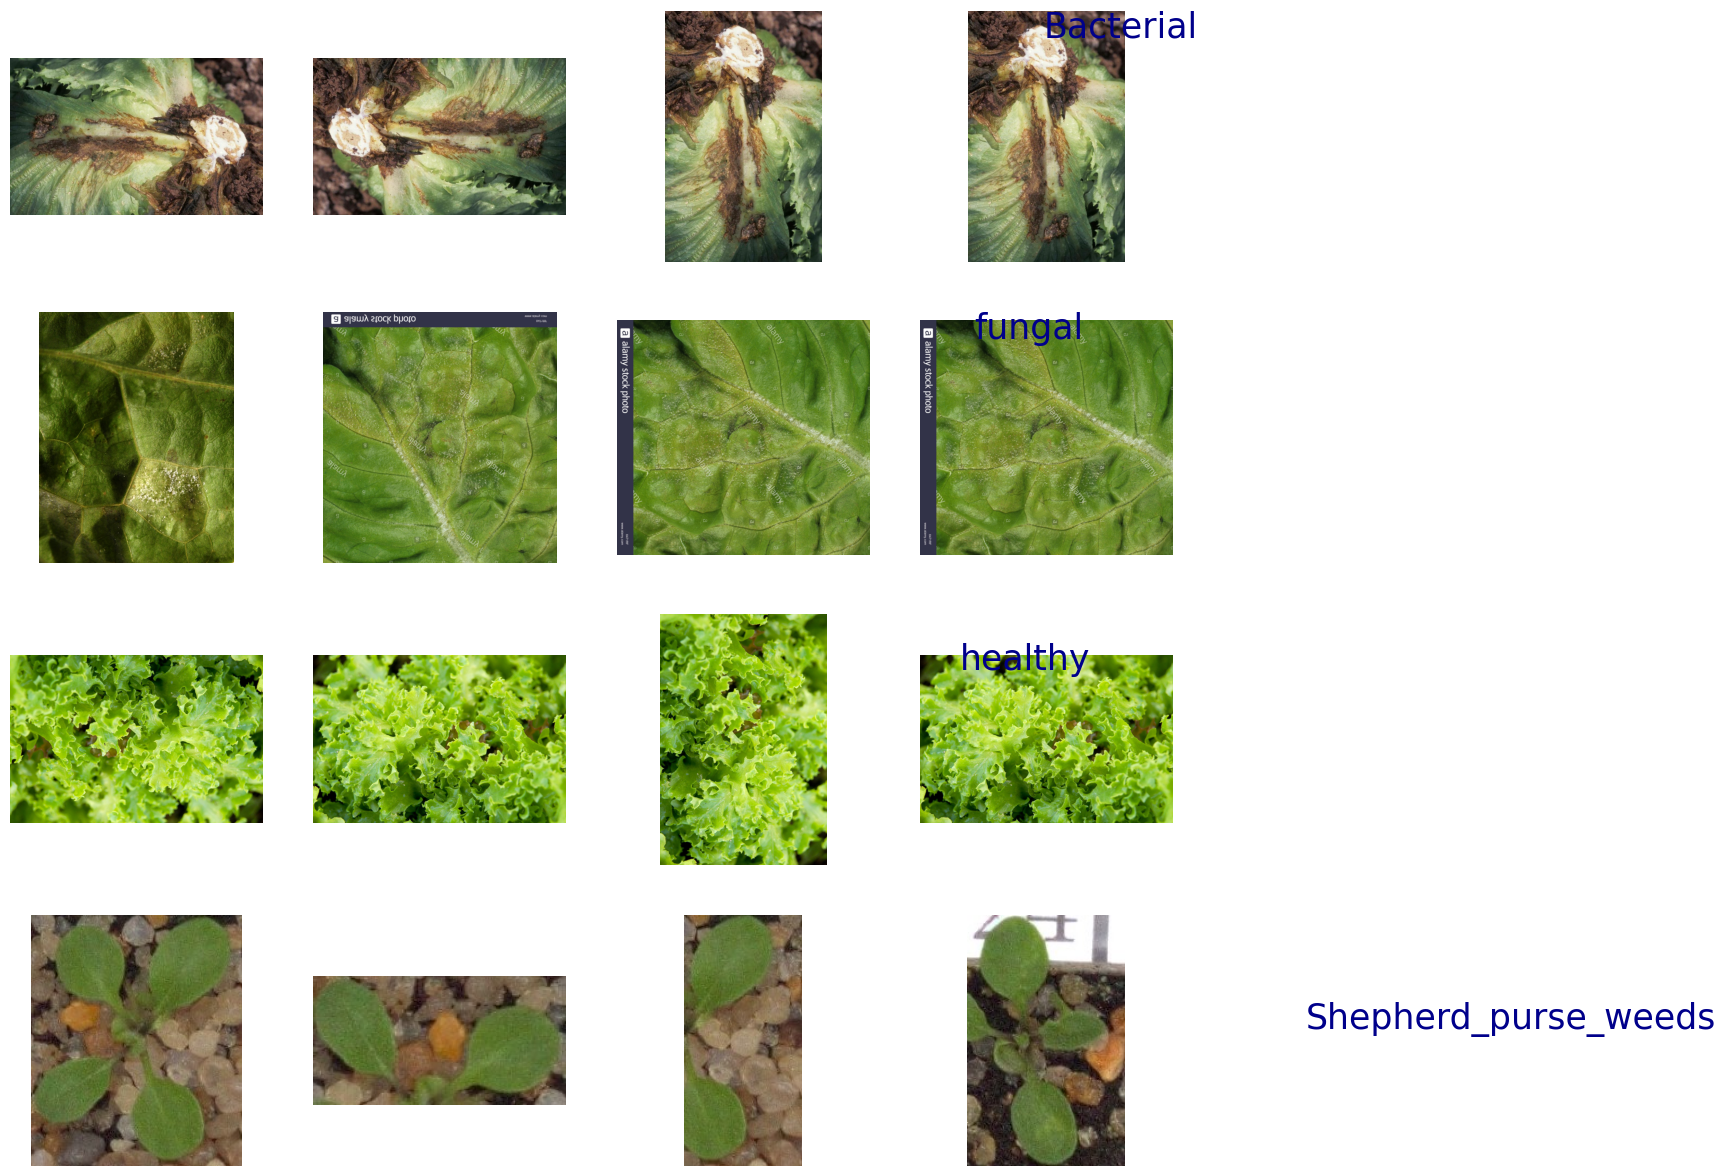

In [15]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(15, 15))
gs = GridSpec(4, 4, figure=fig)

for i, category in enumerate(df['label'].unique()):
    filepaths = df[df['label'] == category]['image'].values[:4]

    for j, filepath in enumerate(filepaths):
        ax = fig.add_subplot(gs[i, j])
        ax.imshow(plt.imread(filepath))
        ax.axis('off')

    ax.text(300, 100, category, fontsize=25, color='darkblue')

plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df['image'], df['label'], test_size=0.2, random_state=42)

df_train = pd.DataFrame({'image': X_train, 'label': y_train})

df_test = pd.DataFrame({'image': X_test, 'label': y_test})

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_size = (256, 256)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
    fill_mode='nearest'
)


train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1856 validated image filenames belonging to 4 classes.
Found 464 validated image filenames belonging to 4 classes.


In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization

model=Sequential()
model.add(Conv2D(256,(3,3),activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(4,activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 256)       │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 256)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 128)       │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         401,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 925,156 (3.53 MB)

 Trainable params: 925,156 (3.53 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer = Adam(learning_rate=0.00001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

In [20]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=50)

Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 723s 11s/step - accuracy: 0.2851 - loss: 1.3812 - val_accuracy: 0.4159 - val_loss: 1.3629
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 62s 964ms/step - accuracy: 0.4496 - loss: 1.3522 - val_accuracy: 0.4655 - val_loss: 1.3184
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 60s 961ms/step - accuracy: 0.4917 - loss: 1.2932 - val_accuracy: 0.4828 - val_loss: 1.2214
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 81s 959ms/step - accuracy: 0.5455 - loss: 1.1813 - val_accuracy: 0.5841 - val_loss: 1.0777
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 82s 937ms/step - accuracy: 0.6130 - loss: 1.0558 - val_accuracy: 0.5409 - val_loss: 1.0042
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 62s 966ms/step - accuracy: 0.6215 - loss: 0.9584 - val_accuracy: 0.6228 - val_loss: 0.9164
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 82s 962ms/step - accuracy: 0.6539 - loss: 0.8921 - val_accuracy: 0.6595 - val_loss: 0.8692
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.6587 - loss: 0.8580 - val_accuracy

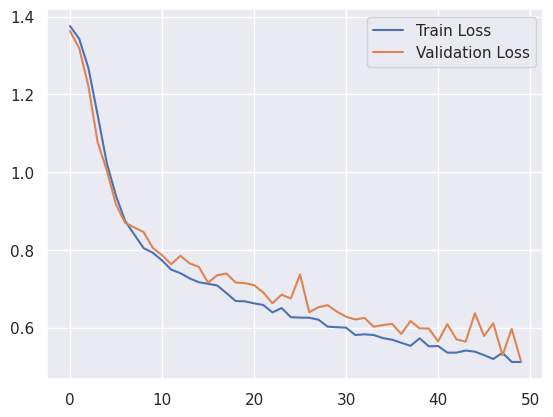

In [21]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

In [22]:
model.evaluate(test_generator)

15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 759ms/step - accuracy: 0.8041 - loss: 0.5585


[0.5404890179634094, 0.8017241358757019]

In [23]:
model.evaluate(train_generator)

58/58 ━━━━━━━━━━━━━━━━━━━━ 45s 776ms/step - accuracy: 0.8030 - loss: 0.5106


[0.5063976645469666, 0.8103448152542114]

15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 739ms/step


<Figure size 1000x800 with 0 Axes>

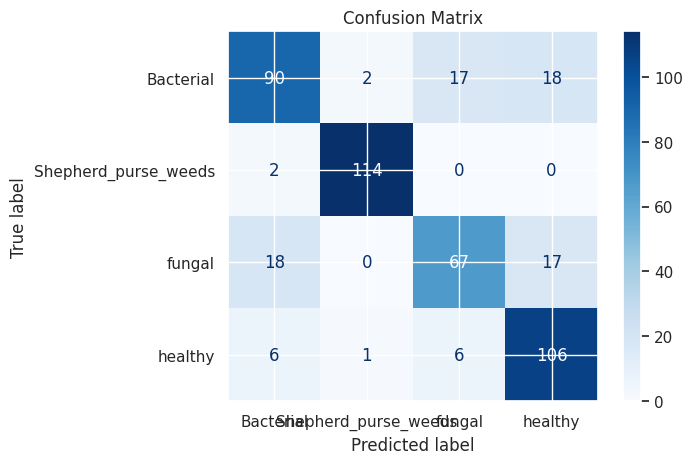

Classification Report:
                      precision    recall  f1-score   support

           Bacterial       0.78      0.71      0.74       127
Shepherd_purse_weeds       0.97      0.98      0.98       116
              fungal       0.74      0.66      0.70       102
             healthy       0.75      0.89      0.82       119

            accuracy                           0.81       464
           macro avg       0.81      0.81      0.81       464
        weighted avg       0.81      0.81      0.81       464



In [24]:
# Confusion Matrix dan Laporan Klasifikasi
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1) 

y_true = test_generator.classes

y_true_decoded = encoder.inverse_transform(y_true)
y_pred_decoded = encoder.inverse_transform(y_pred_classes)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)

plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_true_decoded, y_pred_decoded, target_names=encoder.classes_))

In [25]:
model.save('/content/drive/MyDrive/model50-lr.keras')